In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) #makes the display bars longer and spread out 100% across the screen width

In [2]:
from vivarium import Artifact
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from db_queries import get_ids, get_outputs
import scipy.stats

In [3]:
#summer_run1 final (scenarios: baseline, mmn, bep_hd_scale_up, bep_hd_targeted_scale_up)

output_dirs =  ['/share/costeffectiveness/results/vivarium_gates_bep/fall_2020/5_a/india/2020_10_16_08_59_11/count_data/',
                 '/share/costeffectiveness/results/vivarium_gates_bep/fall_2020/5_a/pakistan/2020_10_16_16_09_17/count_data/',
                 '/share/costeffectiveness/results/vivarium_gates_bep/fall_2020/5_a/mali/2020_10_16_16_06_10/count_data/',
                 '/share/costeffectiveness/results/vivarium_gates_bep/fall_2020/5_a/tanzania/2020_10_16_16_12_19/count_data/']

locations = ['India',
            'Pakistan',
            'Mali',
            'Tanzania']

#use in sort_values to make custum sort list. I sorted by region. 
sorter = ['India','Pakistan','Mali','Tanzania']
sorterIndex = dict(zip(sorter,range(len(sorter))))

!whoami
!date


nicoly
Wed Dec  9 12:50:51 PST 2020


# EXPLORE

In [4]:
%cd '/share/costeffectiveness/results/vivarium_gates_bep/fall_2020/5_a/india/2020_10_16_08_59_11/count_data/'
%ls

/ihme/costeffectiveness/results/vivarium_gates_bep/fall_2020/5_a/india/2020_10_16_08_59_11/count_data
birth_weight.csv    deaths.csv           population.csv         ylds.csv
birth_weight.hdf    deaths.hdf           population.hdf         ylds.hdf
cgf_categories.csv  gestational_age.csv  state_person_time.csv  ylls.csv
cgf_categories.hdf  gestational_age.hdf  state_person_time.hdf  ylls.hdf
cgf_z_scores.csv    person_time.csv      transition_count.csv
cgf_z_scores.hdf    person_time.hdf      transition_count.hdf


In [5]:
df = pd.read_hdf('/share/costeffectiveness/results/vivarium_gates_bep/fall_2020/5_a/india/2020_10_16_08_59_11/count_data/deaths.hdf')
df.head()
    

,age_group,cause,treatment_group,mother_status,measure,input_draw,scenario,value
0,1_to_4,diarrheal_diseases,bep,malnourished,death,3,baseline,0.0
1,1_to_4,diarrheal_diseases,bep,malnourished,death,3,bep_ce_scale_up,1.0
2,1_to_4,diarrheal_diseases,bep,malnourished,death,3,bep_ce_targeted_scale_up,1.0
3,1_to_4,diarrheal_diseases,bep,malnourished,death,3,mmn_scale_up,0.0
4,1_to_4,diarrheal_diseases,bep,malnourished,death,21,baseline,0.0


In [4]:
deaths_india = pd.read_hdf('/share/costeffectiveness/results/vivarium_gates_bep/fall_2020/5_a/india/2020_10_16_08_59_11/count_data/deaths.hdf')
deaths_india.head()
    

,age_group,cause,treatment_group,mother_status,measure,input_draw,scenario,value
0,1_to_4,diarrheal_diseases,bep,malnourished,death,3,baseline,0.0
1,1_to_4,diarrheal_diseases,bep,malnourished,death,3,bep_ce_scale_up,1.0
2,1_to_4,diarrheal_diseases,bep,malnourished,death,3,bep_ce_targeted_scale_up,1.0
3,1_to_4,diarrheal_diseases,bep,malnourished,death,3,mmn_scale_up,0.0
4,1_to_4,diarrheal_diseases,bep,malnourished,death,21,baseline,0.0


In [5]:
deaths_india.describe()

,input_draw,value
count,40000.000000,40000.000000
mean,469.440000,17.765125
std,272.459653,82.253852
min,3.000000,0.000000
25%,232.000000,0.000000
50%,497.500000,0.000000
75%,674.000000,6.000000
max,990.000000,1153.000000


In [6]:
deaths_india.cause.value_counts()

lower_respiratory_infections    8000
measles                         8000
protein_energy_malnutrition     8000
other_causes                    8000
diarrheal_diseases              8000
Name: cause, dtype: int64

In [7]:
deaths_india.treatment_group.value_counts()

none    10000
ifa     10000
bep     10000
mmn     10000
Name: treatment_group, dtype: int64

In [8]:
deaths_india.mother_status.value_counts()

normal          20000
malnourished    20000
Name: mother_status, dtype: int64

In [9]:
deaths_india.measure.value_counts()

death    40000
Name: measure, dtype: int64

In [10]:
deaths_india.input_draw.nunique()

50

In [11]:
deaths_india.scenario.value_counts()

baseline                    10000
mmn_scale_up                10000
bep_ce_scale_up             10000
bep_ce_targeted_scale_up    10000
Name: scenario, dtype: int64

In [12]:
deaths_india.age_group.value_counts()

early_neonatal    8000
6mo_to_1          8000
1_to_4            8000
late_neonatal     8000
1mo_to_6mo        8000
Name: age_group, dtype: int64

In [13]:
deaths_india = (deaths_india.where(deaths_india['scenario'] == 'baseline').dropna()
              .groupby(['input_draw','age_group'], as_index=False).sum()
              .rename(columns={'value':'deaths'}))
deaths_india.head()    

,input_draw,age_group,deaths
0,3.0,1_to_4,114.0
1,3.0,1mo_to_6mo,552.0
2,3.0,6mo_to_1,607.0
3,3.0,early_neonatal,1986.0
4,3.0,late_neonatal,407.0


In [16]:
pt_india = pd.read_hdf('/share/costeffectiveness/results/vivarium_gates_bep/fall_2020/5_a/india/2020_10_16_08_59_11/count_data/person_time.hdf')
pt_india.head()

,age_group,treatment_group,mother_status,measure,input_draw,scenario,value
0,1_to_4,bep,malnourished,person_time,3,baseline,0.000000
1,1_to_4,bep,malnourished,person_time,3,bep_ce_scale_up,12981.227242
2,1_to_4,bep,malnourished,person_time,3,bep_ce_targeted_scale_up,12981.227242
3,1_to_4,bep,malnourished,person_time,3,mmn_scale_up,0.000000
4,1_to_4,bep,malnourished,person_time,21,baseline,0.000000


In [17]:
pt_india.describe()

,input_draw,value
count,8000.000000,8000.000000
mean,469.440000,4840.750509
std,272.473277,11461.349472
min,3.000000,0.000000
25%,232.000000,0.000000
50%,497.500000,28.413315
75%,674.000000,3649.782731
max,990.000000,65453.723477


In [18]:
#pt_india['scenario'].describe

In [19]:
pt_india  = (pt_india.where(pt_india['scenario'] == 'baseline').dropna()
          .groupby(['input_draw','age_group'], as_index=False).sum()
          .rename(columns={'value':'person_time'}))
pt_india.head()

,input_draw,age_group,person_time
0,3.0,1_to_4,96257.248460
1,3.0,1mo_to_6mo,41200.517949
2,3.0,6mo_to_1,48377.833333
3,3.0,early_neonatal,1897.861705
4,3.0,late_neonatal,5627.285986


In [20]:
data_india = deaths_india.merge(pt_india, right_on=['input_draw','age_group'],
               left_on=['input_draw','age_group'])
data_india.head()

,input_draw,age_group,deaths,person_time
0,3.0,1_to_4,114.0,96257.248460
1,3.0,1mo_to_6mo,552.0,41200.517949
2,3.0,6mo_to_1,607.0,48377.833333
3,3.0,early_neonatal,1986.0,1897.861705
4,3.0,late_neonatal,407.0,5627.285986


In [21]:
data_india['cause_specific_mortality_rate'] = data_india['deaths'] / data_india['person_time'] #make new column cause_specific_mortality_rate
data_india.head()


,input_draw,age_group,deaths,person_time,cause_specific_mortality_rate
0,3.0,1_to_4,114.0,96257.248460,0.001184
1,3.0,1mo_to_6mo,552.0,41200.517949,0.013398
2,3.0,6mo_to_1,607.0,48377.833333,0.012547
3,3.0,early_neonatal,1986.0,1897.861705,1.046441
4,3.0,late_neonatal,407.0,5627.285986,0.072326


In [22]:
data_india['input_draw'].nunique()

50

In [23]:
data_sum_india = data_india.groupby('age_group').cause_specific_mortality_rate.describe(percentiles=[.025, 0.975]).filter(['mean', '2.5%', '97.5%']).reset_index()
data_sum_india
# summarized over the 50 draws

,age_group,mean,2.5%,97.5%
0,1_to_4,0.001525,0.001283,0.001831
1,1mo_to_6mo,0.012827,0.011655,0.014334
2,6mo_to_1,0.012687,0.011228,0.013738
3,early_neonatal,1.051548,0.985262,1.117906
4,late_neonatal,0.072156,0.064152,0.080188


In [24]:
# GET LOWER AND UPPER LIMITS

def getLims(df):
    df['lower']=df['mean']-df['2.5%']
    df['upper']=df['97.5%']-df['mean']
    return df


getLims(data_sum_india)

,age_group,mean,2.5%,97.5%,lower,upper
0,1_to_4,0.001525,0.001283,0.001831,0.000242,0.000307
1,1mo_to_6mo,0.012827,0.011655,0.014334,0.001172,0.001507
2,6mo_to_1,0.012687,0.011228,0.013738,0.001459,0.001051
3,early_neonatal,1.051548,0.985262,1.117906,0.066286,0.066358
4,late_neonatal,0.072156,0.064152,0.080188,0.008004,0.008032


In [25]:
#error limits for india: lower, upper
yerr_india = np.c_[data_sum_india['mean']-data_sum_india['2.5%'], data_sum_india['97.5%']-data_sum_india['mean']].T
yerr_india


array([[0.00024233, 0.00117166, 0.00145885, 0.0662857 , 0.0080044 ],
       [0.00030658, 0.0015071 , 0.00105051, 0.0663581 , 0.00803156]])

# MODEL ACMR by countries

## MEAN , 95%UI ACMR table by location

In [26]:
acmr = pd.DataFrame()

    #     def getLims(df):
    #     df['lower']=df['mean']-df['2.5%']
    #     df['upper']=df['97.5%']-df['mean']
    #     return df


for i in list(range(len(output_dirs))):
    #deaths
    deaths = pd.read_hdf(output_dirs[i] + 'deaths.hdf')
    deaths = (deaths.where(deaths['scenario'] == 'baseline').dropna() #want baseline scenario only
              .groupby(['input_draw','age_group'], as_index=False).sum() #only want input_draw and age_group groups; sum deaths over treatment_grp and mom_status and other colums
              .rename(columns={'value':'deaths'}))
    
    #person_time
    pt = pd.read_hdf(output_dirs[i] + 'person_time.hdf')
    pt = (pt.where(pt['scenario'] == 'baseline').dropna()  #want baseline scenario only
          .groupby(['input_draw','age_group'], as_index=False).sum()  #only want input_draw and age_group groups; sum pt over treatment_grp and mom_status
          .rename(columns={'value':'person_time'}))
    
    data = deaths.merge(pt, right_on=['input_draw','age_group'],
               left_on=['input_draw','age_group'])
    
    #CALCULATE ACMR by dividing death counts by person_time in age_group
    data['cause_specific_mortality_rate'] = data['deaths'] / data['person_time'] #make new column cause_specific_mortality_rate which is the ACMR
    #this is actually the acmr because we grouped summed deaths over the causes
    
    #AVERAGE OVER DRAWS, get 95% UIs, lower and upper lims
    data = data.groupby('age_group').cause_specific_mortality_rate.describe(percentiles=[.025, 0.975]).filter(['mean', '2.5%', '97.5%']).reset_index()
    getLims(data) #gets the lower and upper -/+ values
    
    #iterate over 4 locations
    data['location'] = locations[i]
     
    acmr = acmr.append(data) 

acmr['location_rank'] = acmr['location'].map(sorterIndex) #sorting by region
acmr = acmr.sort_values(by='location_rank')

acmr.head(10)

,age_group,mean,2.5%,97.5%,lower,upper,location,location_rank
0,1_to_4,0.001525,0.001283,0.001831,0.000242,0.000307,India,0
1,1mo_to_6mo,0.012827,0.011655,0.014334,0.001172,0.001507,India,0
2,6mo_to_1,0.012687,0.011228,0.013738,0.001459,0.001051,India,0
3,early_neonatal,1.051548,0.985262,1.117906,0.066286,0.066358,India,0
4,late_neonatal,0.072156,0.064152,0.080188,0.008004,0.008032,India,0
3,early_neonatal,1.588851,1.348008,1.873416,0.240843,0.284565,Pakistan,1
2,6mo_to_1,0.014644,0.009484,0.020677,0.005160,0.006033,Pakistan,1
4,late_neonatal,0.113956,0.098167,0.135356,0.015789,0.021400,Pakistan,1
0,1_to_4,0.002405,0.001965,0.003057,0.000440,0.000653,Pakistan,1
1,1mo_to_6mo,0.014620,0.010071,0.022249,0.004549,0.007628,Pakistan,1


# GET ARTIFACT ACMR

## EXPLORE India 

In [27]:
art_india = Artifact('/share/costeffectiveness/artifacts/vivarium_gates_bep/india.hdf', 
                   filter_terms=['year_start == 2017', 'age_start < 5'])
art_india

Artifact(keys=['metadata.keyspace', 'metadata.locations', 'population.structure', 'population.age_bins', 'population.demographic_dimensions', 'population.theoretical_minimum_risk_life_expectancy', 'cause.all_causes.cause_specific_mortality_rate', 'covariate.live_births_by_sex.estimate', 'covariate.antenatal_care_1_visit_coverage_proportion.estimate', 'cause.diarrheal_diseases.prevalence', 'cause.diarrheal_diseases.incidence_rate', 'cause.diarrheal_diseases.remission_rate', 'cause.diarrheal_diseases.cause_specific_mortality_rate', 'cause.diarrheal_diseases.excess_mortality_rate', 'cause.diarrheal_diseases.disability_weight', 'cause.diarrheal_diseases.restrictions', 'cause.measles.prevalence', 'cause.measles.incidence_rate', 'cause.measles.cause_specific_mortality_rate', 'cause.measles.excess_mortality_rate', 'cause.measles.disability_weight', 'cause.measles.restrictions', 'cause.lower_respiratory_infections.prevalence', 'cause.lower_respiratory_infections.birth_prevalence', 'cause.lower

In [28]:
art_india_dd = art_india.load('cause.diarrheal_diseases.cause_specific_mortality_rate')
art_india_dd

draw_0    draw_1  \
location sex    age_start age_end  year_start year_end                       
India    Female 0.000000  0.019178 2017       2018      0.011798  0.013862   
                0.019178  0.076712 2017       2018      0.006836  0.008108   
                0.076712  1.000000 2017       2018      0.002940  0.003298   
                1.000000  5.000000 2017       2018      0.000310  0.000305   
         Male   0.000000  0.019178 2017       2018      0.009492  0.009619   
                0.019178  0.076712 2017       2018      0.003457  0.004629   
                0.076712  1.000000 2017       2018      0.001916  0.002271   
                1.000000  5.000000 2017       2018      0.000167  0.000117   

                                                          draw_2    draw_3  \
location sex    age_start age_end  year_start year_end                       
India    Female 0.000000  0.019178 2017       2018      0.015074  0.013970   
                0.019178  0.076712 2017       2018      0.006748  0.007484   
                0.076712  1.000000 2017       2018      0.003331  0.002846   
                1.000000  5.000000 2017       2018      0.000282  0.000350   
         Male   0.000000  0.019178 2017       2018      0.008872  0.010809   
                0.019178  0.076712 2017       2018      0.003844  0.004449   
                0.076712  1.000000 2017       2018      0.002071  0.002185   
                1.000000  5.000000 2017       2018      0.000116  0.000147   

                                                          draw_4    draw_5  \
location sex    age_start age_end  year_start year_end                       
India    Female 0.000000  0.019178 2017       2018      0.012909  0.012674   
                0.019178  0.076712 2017       2018      0.010523  0.005068   
                0.076712  1.000000 2017       2018      0.003550  0.002231   
                1.000000  5.000000 2017       2018      0.000370  0.000168   
         Male   0.000000  0.019178 2017       2018      0.011271  0.009492   
                0.019178  0.076712 2017       2018      0.003739  0.004127   
                0.076712  1.000000 2017       2018      0.002378  0.001950   
                1.000000  5.000000 2017       2018      0.000153  0.000136   

                                                          draw_6    draw_7  \
location sex    age_start age_end  year_start year_end                       
India    Female 0.000000  0.019178 2017       2018      0.011102  0.012344   
                0.019178  0.076712 2017       2018      0.005984  0.005791   
                0.076712  1.000000 2017       2018      0.002666  0.002882   
                1.000000  5.000000 2017       2018      0.000174  0.000184   
         Male   0.000000  0.019178 2017       2018      0.011860  0.009146   
                0.019178  0.076712 2017       2018      0.004801  0.005309   
                0.076712  1.000000 2017       2018      0.001918  0.002052   
                1.000000  5.000000 2017       2018      0.000165  0.000132   

                                                          draw_8    draw_9  \
location sex    age_start age_end  year_start year_end                       
India    Female 0.000000  0.019178 2017       2018      0.009375  0.011399   
                0.019178  0.076712 2017       2018      0.008172  0.006460   
                0.076712  1.000000 2017       2018      0.002713  0.003392   
                1.000000  5.000000 2017       2018      0.000197  0.000215   
         Male   0.000000  0.019178 2017       2018      0.010988  0.011982   
                0.019178  0.076712 2017       2018      0.003462  0.003784   
                0.076712  1.000000 2017       2018      0.002184  0.002170   
                1.000000  5.000000 2017       2018      0.000150  0.000157   

                                                        ...  draw_990  \
location sex    age_start age_end  year_start year_end  ...             
India  

In [29]:
#key = 'cause.all_causes.cause_specific_mortality_rate' is the ACMR

art_india_data = art_india.load('cause.all_causes.cause_specific_mortality_rate')


In [30]:
type(art_india_data)

pandas.core.frame.DataFrame

In [31]:
df = pd.DataFrame(art_india_data)
df
# art_india_data

draw_0    draw_1  \
location sex    age_start age_end  year_start year_end                       
India    Female 0.000000  0.019178 2017       2018      0.870807  0.907630   
                0.019178  0.076712 2017       2018      0.090068  0.094254   
                0.076712  1.000000 2017       2018      0.014778  0.015406   
                1.000000  5.000000 2017       2018      0.001753  0.001472   
         Male   0.000000  0.019178 2017       2018      0.976472  1.014065   
                0.019178  0.076712 2017       2018      0.071707  0.074956   
                0.076712  1.000000 2017       2018      0.011686  0.012167   
                1.000000  5.000000 2017       2018      0.001332  0.001151   

                                                          draw_2    draw_3  \
location sex    age_start age_end  year_start year_end                       
India    Female 0.000000  0.019178 2017       2018      0.919207  0.893570   
                0.019178  0.076712 2017       2018      0.095566  0.092964   
                0.076712  1.000000 2017       2018      0.015559  0.015316   
                1.000000  5.000000 2017       2018      0.001661  0.001653   
         Male   0.000000  0.019178 2017       2018      1.028692  1.014953   
                0.019178  0.076712 2017       2018      0.075844  0.074428   
                0.076712  1.000000 2017       2018      0.012322  0.012157   
                1.000000  5.000000 2017       2018      0.001277  0.001302   

                                                          draw_4    draw_5  \
location sex    age_start age_end  year_start year_end                       
India    Female 0.000000  0.019178 2017       2018      0.917868  0.891892   
                0.019178  0.076712 2017       2018      0.095292  0.092789   
                0.076712  1.000000 2017       2018      0.015522  0.015278   
                1.000000  5.000000 2017       2018      0.001655  0.001716   
         Male   0.000000  0.019178 2017       2018      1.023535  0.993299   
                0.019178  0.076712 2017       2018      0.075358  0.073482   
                0.076712  1.000000 2017       2018      0.012207  0.011942   
                1.000000  5.000000 2017       2018      0.001235  0.001297   

                                                          draw_6    draw_7  \
location sex    age_start age_end  year_start year_end                       
India    Female 0.000000  0.019178 2017       2018      0.896824  0.911106   
                0.019178  0.076712 2017       2018      0.093017  0.094132   
                0.076712  1.000000 2017       2018      0.015325  0.015497   
                1.000000  5.000000 2017       2018      0.001633  0.001624   
         Male   0.000000  0.019178 2017       2018      1.003032  1.017809   
                0.019178  0.076712 2017       2018      0.072258  0.074367   
                0.076712  1.000000 2017       2018      0.011874  0.012208   
                1.000000  5.000000 2017       2018      0.001269  0.001239   

                                                          draw_8    draw_9  \
location sex    age_start age_end  year_start year_end                       
India    Female 0.000000  0.019178 2017       2018      0.914929  0.964330   
                0.019178  0.076712 2017       2018      0.094721  0.099607   
                0.076712  1.000000 2017       2018      0.015613  0.016452   
                1.000000  5.000000 2017       2018      0.001667  0.001692   
         Male   0.000000  0.019178 2017       2018      1.021726  1.076135   
                0.019178  0.076712 2017       2018      0.074864  0.078802   
                0.076712  1.000000 2017       2018      0.012223  0.012916   
                1.000000  5.000000 2017       2018      0.001293  0.001308   

                                                        ...  draw_990  \
location sex    age_start age_end  year_start year_end  ...             
India  

In [32]:
# Average over sex

grpAvs = df.groupby(['location', 'age_start', 'age_end', 'year_start', 'year_end']).mean()
grpAvs

draw_0    draw_1    draw_2  \
location age_start age_end  year_start year_end                                 
India    0.000000  0.019178 2017       2018      0.923640  0.960848  0.973949   
         0.019178  0.076712 2017       2018      0.080888  0.084605  0.085705   
         0.076712  1.000000 2017       2018      0.013232  0.013786  0.013940   
         1.000000  5.000000 2017       2018      0.001542  0.001311  0.001469   

                                                   draw_3    draw_4    draw_5  \
location age_start age_end  year_start year_end                                 
India    0.000000  0.019178 2017       2018      0.954261  0.970702  0.942595   
         0.019178  0.076712 2017       2018      0.083696  0.085325  0.083136   
         0.076712  1.000000 2017       2018      0.013736  0.013865  0.013610   
         1.000000  5.000000 2017       2018      0.001477  0.001445  0.001507   

                                                   draw_6    draw_7    draw_8  \
location age_start age_end  year_start year_end                                 
India    0.000000  0.019178 2017       2018      0.949928  0.964457  0.968328   
         0.019178  0.076712 2017       2018      0.082638  0.084250  0.084792   
         0.076712  1.000000 2017       2018      0.013600  0.013852  0.013918   
         1.000000  5.000000 2017       2018      0.001451  0.001431  0.001480   

                                                   draw_9  ...  draw_990  \
location age_start age_end  year_start year_end            ...             
India    0.000000  0.019178 2017       2018      1.020233  ...  0.930838   
         0.019178  0.076712 2017       2018      0.089204  ...  0.081661   
         0.076712  1.000000 2017       2018      0.014684  ...  0.013350   
         1.000000  5.000000 2017       2018      0.001500  ...  0.001565   

                                                 draw_991  draw_992  draw_993  \
location age_start age_end  year_start year_end                                 
India    0.000000  0.019178 2017       2018      0.985387  1.020443  0.917053   
         0.019178  0.076712 2017       2018      0.086326  0.089346  0.080172   
         0.076712  1.000000 2017       2018      0.014138  0.014596  0.013052   
         1.000000  5.000000 2017       2018      0.001540  0.001727  0.001585   

                                                 draw_994  draw_995  draw_996  \
location age_start age_end  year_start year_end                                 
India    0.000000  0.019178 2017       2018      1.011857  0.985512  0.999630   
         0.019178  0.076712 2017       2018      0.088553  0.086361  0.087954   
         0.076712  1.000000 2017       2018      0.014516  0.014180  0.014489   
         1.000000  5.000000 2017       2018      0.001370  0.001365  0.001540   

                                                 draw_997  draw_998  draw_999  
location age_start age_end  year_start year_end                                
India    0.000000  0.019178 2017       2018      0.964222  0.933780  0.955705  
         0.019178  0.076712 2017       2018      0.084548  0.081630  0.084136  
         0.076712  1.000000 2017       2018      0.013831  0.013392  0.013794  
         1.000000  5.000000 2017       2018      0.001501  0.001527  0.001597  

[4 rows x 1000 columns]

In [33]:
#AVERAGE over draws, get 95% UIs using the getlims function defined earlier

df1 = grpAvs.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1).filter(['mean', '2.5%', '97.5%'])
df2 = getLims(df1)
df2

mean      2.5%     97.5%  \
location age_start age_end  year_start year_end                                 
India    0.000000  0.019178 2017       2018      0.957582  0.904700  1.019725   
         0.019178  0.076712 2017       2018      0.084038  0.079260  0.089320   
         0.076712  1.000000 2017       2018      0.013731  0.012940  0.014650   
         1.000000  5.000000 2017       2018      0.001530  0.001361  0.001725   

                                                    lower     upper  
location age_start age_end  year_start year_end                      
India    0.000000  0.019178 2017       2018      0.052882  0.062144  
         0.019178  0.076712 2017       2018      0.004778  0.005282  
         0.076712  1.000000 2017       2018      0.000792  0.000919  
         1.000000  5.000000 2017       2018      0.000168  0.000196

# ARTIFACT ACMR BY COUNTRIES

In [34]:
# define function to load data from artifact for a specified cause and measure
# this function is called in the next function below

def load_artifact_data(cause, measure):
    master_art_data = pd.DataFrame()
    
    for i in ['india','pakistan','mali','tanzania']:
        
        art = Artifact('/share/costeffectiveness/artifacts/vivarium_gates_bep/' + i + '.hdf', 
                   filter_terms=['year_start == 2017', 'age_start < 5'])
        data = art.load('cause.' + cause + '.' + measure)
        
        # read into dframe
        data = pd.DataFrame(data)
        
        # average over sex
        data = data.groupby(['location', 'age_start', 'age_end', 'year_start', 'year_end']).mean()
        
        # get mean/95%CI upper lower
        data = data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1).filter(['mean', '2.5%', '97.5%'])
        data = getLims(data).reset_index()
        
        data['location'] = i.capitalize()
        data['measure'] = measure
        data['age_group'] = 0
        data['age_group'] = np.where(data['age_start'] == 0, 'early_neonatal', 
                                   np.where(data['age_end'] == 1, '1mo_to_6mo',
                                            np.where(data['age_start'] == 1, '1_to_4', 
                                                    'late_neonatal')))
        master_art_data = master_art_data.append(data)
        
    return master_art_data

art_acmr = load_artifact_data('all_causes', 'cause_specific_mortality_rate')
art_acmr['location_rank'] = art_acmr['location'].map(sorterIndex) #sorting by region
art_acmr = art_acmr.sort_values(by='location_rank')

art_acmr.head(10)

,location,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,lower,upper,measure,age_group,location_rank
0,India,0.000000,0.019178,2017,2018,0.957582,0.904700,1.019725,0.052882,0.062144,cause_specific_mortality_rate,early_neonatal,0
1,India,0.019178,0.076712,2017,2018,0.084038,0.079260,0.089320,0.004778,0.005282,cause_specific_mortality_rate,late_neonatal,0
2,India,0.076712,1.000000,2017,2018,0.013731,0.012940,0.014650,0.000792,0.000919,cause_specific_mortality_rate,1mo_to_6mo,0
3,India,1.000000,5.000000,2017,2018,0.001530,0.001361,0.001725,0.000168,0.000196,cause_specific_mortality_rate,1_to_4,0
0,Pakistan,0.000000,0.019178,2017,2018,1.477625,1.189725,1.798766,0.287900,0.321141,cause_specific_mortality_rate,early_neonatal,1
1,Pakistan,0.019178,0.076712,2017,2018,0.130470,0.105678,0.157734,0.024792,0.027264,cause_specific_mortality_rate,late_neonatal,1
2,Pakistan,0.076712,1.000000,2017,2018,0.014681,0.008973,0.023137,0.005708,0.008456,cause_specific_mortality_rate,1mo_to_6mo,1
3,Pakistan,1.000000,5.000000,2017,2018,0.002433,0.001962,0.002963,0.000471,0.000530,cause_specific_mortality_rate,1_to_4,1
0,Mali,0.000000,0.019178,2017,2018,1.675312,1.356244,2.087423,0.319068,0.412111,cause_specific_mortality_rate,early_neonatal,2
1,Mali,0.019178,0.076712,2017,2018,0.130213,0.105653,0.161597,0.024559,0.031384,cause_specific_mortality_rate,late_neonatal,2


# COMPARISON PLOTS - model vs artifact

In [35]:
acmr

,age_group,mean,2.5%,97.5%,lower,upper,location,location_rank
0,1_to_4,0.001525,0.001283,0.001831,0.000242,0.000307,India,0
1,1mo_to_6mo,0.012827,0.011655,0.014334,0.001172,0.001507,India,0
2,6mo_to_1,0.012687,0.011228,0.013738,0.001459,0.001051,India,0
3,early_neonatal,1.051548,0.985262,1.117906,0.066286,0.066358,India,0
4,late_neonatal,0.072156,0.064152,0.080188,0.008004,0.008032,India,0
3,early_neonatal,1.588851,1.348008,1.873416,0.240843,0.284565,Pakistan,1
2,6mo_to_1,0.014644,0.009484,0.020677,0.005160,0.006033,Pakistan,1
4,late_neonatal,0.113956,0.098167,0.135356,0.015789,0.021400,Pakistan,1
0,1_to_4,0.002405,0.001965,0.003057,0.000440,0.000653,Pakistan,1
1,1mo_to_6mo,0.014620,0.010071,0.022249,0.004549,0.007628,Pakistan,1


In [36]:
art_acmr

,location,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,lower,upper,measure,age_group,location_rank
0,India,0.000000,0.019178,2017,2018,0.957582,0.904700,1.019725,0.052882,0.062144,cause_specific_mortality_rate,early_neonatal,0
1,India,0.019178,0.076712,2017,2018,0.084038,0.079260,0.089320,0.004778,0.005282,cause_specific_mortality_rate,late_neonatal,0
2,India,0.076712,1.000000,2017,2018,0.013731,0.012940,0.014650,0.000792,0.000919,cause_specific_mortality_rate,1mo_to_6mo,0
3,India,1.000000,5.000000,2017,2018,0.001530,0.001361,0.001725,0.000168,0.000196,cause_specific_mortality_rate,1_to_4,0
0,Pakistan,0.000000,0.019178,2017,2018,1.477625,1.189725,1.798766,0.287900,0.321141,cause_specific_mortality_rate,early_neonatal,1
1,Pakistan,0.019178,0.076712,2017,2018,0.130470,0.105678,0.157734,0.024792,0.027264,cause_specific_mortality_rate,late_neonatal,1
2,Pakistan,0.076712,1.000000,2017,2018,0.014681,0.008973,0.023137,0.005708,0.008456,cause_specific_mortality_rate,1mo_to_6mo,1
3,Pakistan,1.000000,5.000000,2017,2018,0.002433,0.001962,0.002963,0.000471,0.000530,cause_specific_mortality_rate,1_to_4,1
0,Mali,0.000000,0.019178,2017,2018,1.675312,1.356244,2.087423,0.319068,0.412111,cause_specific_mortality_rate,early_neonatal,2
1,Mali,0.019178,0.076712,2017,2018,0.130213,0.105653,0.161597,0.024559,0.031384,cause_specific_mortality_rate,late_neonatal,2


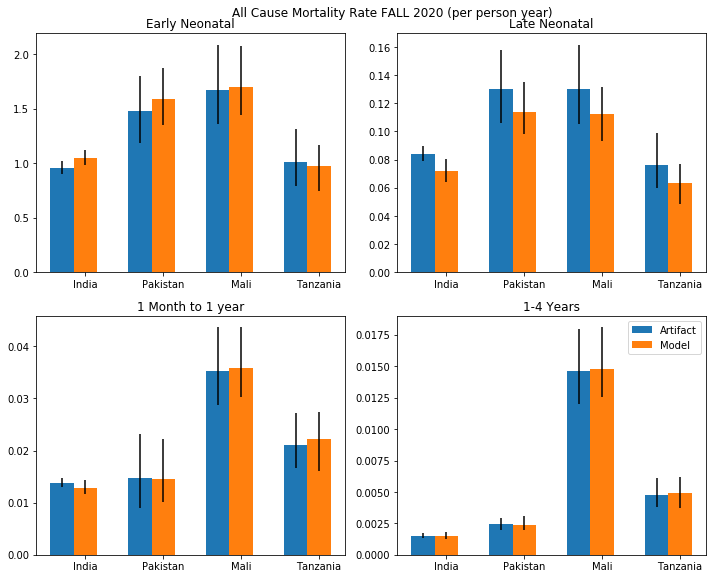

In [37]:
model_data = acmr
artifact_data = art_acmr

barWidth = 0.3
#fig,axs = plt.subplots(2,2)                                                                  
fig,axs = plt.subplots(2,2,figsize=(10,8)) #width, height

#EARLY NEONATAL 1

model = model_data['mean'].where(model_data['age_group'] == 'early_neonatal').dropna()
gbd = artifact_data['mean'].where(artifact_data['age_group'] == 'early_neonatal').dropna()
modErr = acmr[['lower','upper']].where(acmr['age_group'] == 'early_neonatal').dropna()
artErr = artifact_data[['lower','upper']].where(artifact_data['age_group'] == 'early_neonatal').dropna()

modyerr = np.array(modErr).T
artyerr = np.array(artErr).T

a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[0,0].bar(a, gbd, yerr = artyerr, width=barWidth)
axs[0,0].bar(b, model, yerr = modyerr, width=barWidth)
axs[0,0].set_title('Early Neonatal')
axs[0,0].set_yticks([0,0.5,1,1.5,2])

#LATE NEONATAL 2

model = model_data['mean'].where(model_data['age_group'] == 'late_neonatal').dropna()
gbd = artifact_data['mean'].where(artifact_data['age_group'] == 'late_neonatal').dropna()
modErr = acmr[['lower','upper']].where(acmr['age_group'] == 'late_neonatal').dropna()
artErr = artifact_data[['lower','upper']].where(artifact_data['age_group'] == 'late_neonatal').dropna()

modyerr = np.array(modErr).T
artyerr = np.array(artErr).T

a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[0,1].bar(a, gbd, yerr = artyerr, width=barWidth)
axs[0,1].bar(b, model, yerr = modyerr, width=barWidth)
axs[0,1].set_title('Late Neonatal')

#1month to 6month/1year 3

model = model_data['mean'].where(model_data['age_group'] == '1mo_to_6mo').dropna()
gbd = artifact_data['mean'].where(artifact_data['age_group'] == '1mo_to_6mo').dropna() # this is actually 1 month to 1 year
modErr = acmr[['lower','upper']].where(acmr['age_group'] == '1mo_to_6mo').dropna()
artErr = artifact_data[['lower','upper']].where(artifact_data['age_group'] == '1mo_to_6mo').dropna()

modyerr = np.array(modErr).T
artyerr = np.array(artErr).T

a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[1,0].bar(a, gbd, yerr = artyerr, width=barWidth)
axs[1,0].bar(b, model, yerr = modyerr, width=barWidth)
axs[1,0].set_title('1 Month to 1 year')
#axs[1,0].ylim

#1year to 4years 4

model = model_data['mean'].where(model_data['age_group'] == '1_to_4').dropna()
gbd = artifact_data['mean'].where(artifact_data['age_group'] == '1_to_4').dropna()
modErr = acmr[['lower','upper']].where(acmr['age_group'] == '1_to_4').dropna()
artErr = artifact_data[['lower','upper']].where(artifact_data['age_group'] == '1_to_4').dropna()

modyerr = np.array(modErr).T
artyerr = np.array(artErr).T

location_order = ['India', 'Pakistan', 'Mali', 'Tanzania']

a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[1,1].bar(a, gbd, yerr = artyerr, width=barWidth)
axs[1,1].bar(b, model, yerr = modyerr, width=barWidth)
axs[1,1].set_title('1-4 Years')


plt.setp(axs, xticks=[r + barWidth for r in range(len(model))], 
         xticklabels=  np.unique(artifact_data['location'])[[0, 2, 1, 3]]) # (['India', 'Pakistan', 'Mali', 'Tanzania'])
                      # np.unique(artifact_data['location'])) # ['India', 'Pakistan', 'Mali', 'Tanzania']
# for ax in axs.flat:
#     ax.set(ylabel='ACMR')


plt.legend(['Artifact','Model'], loc = 1)
plt.suptitle('All Cause Mortality Rate FALL 2020 (per person year)',x=0.55, y=1)
plt.subplots_adjust(right=2, top=2)
plt.tight_layout()

In [36]:
np.unique(artifact_data['location'])#[[0, 2, 1, 3]]

array(['India', 'Mali', 'Pakistan', 'Tanzania'], dtype=object)

# ROOT MEAN SQUARE ERROR (RMSE)

In [37]:
model =
gbd = 

mse = sklearn.metrics.mean_squared_error(model, gbd)

rmse = math.sqrt(mse)

print(rmse)



SyntaxError: invalid syntax (<ipython-input-37-c625c492a7df>, line 1)

In [ ]:
##TEST ERROR getlims

# acmr.head()
barWidth = 0.3
fig,axs = plt.subplots(2,2)                                                                  

model = acmr['mean'].where(acmr['age_group'] == 'early_neonatal').dropna()
print(model)
modErr = acmr[['upper','lower']].where(acmr['age_group'] == 'early_neonatal').dropna()
print(modErr)
modyerr = np.array(modErr).T

gbd = artifact_data['mean'].where(artifact_data['age_group'] == 'early_neonatal').dropna()
print(gbd)
artErr = artifact_data[['upper','lower']].where(artifact_data['age_group'] == 'early_neonatal').dropna()
print(artErr)
artyerr = np.array(artErr).T

a = np.arange(len(model))
b = [x + barWidth for x in a]

# print(model), print(gbd)
axs[0,0].bar(a, gbd, yerr = artyerr, width=barWidth)
axs[0,0].bar(b, model, yerr=modyerr, width=barWidth)
axs[0,0].set_title('Early Neonatal')
